In [1]:
from proveit.physics.quantum.QPE.theorems import intermediateQPE, phaseInReals
from proveit.physics.quantum.QPE.axioms import nInNatPos, unitaryU, uKetRegister, eigenUu
from proveit.physics.quantum.QPE.common import U_, u_, n_, U_pow_two_pow_k
from proveit.physics.quantum import Ket
from proveit.physics.quantum.axioms import ketZeroInQubitSpace, ketOneInQubitSpace, hadamardOnZero, \
    zeroControlledNgate, oneControlledNgate
from proveit.physics.quantum.theorems import unitaryHadamard, ketPlusDistributed, pregatedControlledNgateEquiv, \
    controlledNgateEquiv, superpositionControlledNgate, scaledQubitStateInQubitSpace, \
    summedQubitStateInQubitSpace, scaledQubitRegisterStateInQubitRegisterSpace
from proveit.physics.quantum.common import ket0, ket1, H, invRoot2, QubitSpace
from proveit.basiclogic import In, compose, Equation, Equals
from proveit.linalg import ScalarProd, MatrixProd
from proveit.linalg.theorems import intPowSUclosure, eigenPow
from proveit.number.numberSets import Naturals, deduceInNaturalsPos, deduceInComplexes
from proveit.number import Add, Exponentiate, Fraction, Sqrt
from proveit.number.common import zero, one, two
from proveit.common import a, b, c, d, k, n, u, x, y, z, A, U, X, alpha, xEtc
from IPython.display import display

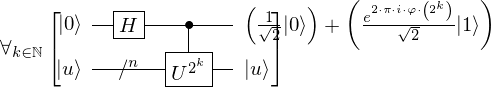

In [2]:
intermediateQPE.beginProof()

In [3]:
display(U_pow_two_pow_k)
kInNats = In(k, Naturals)
display(kInNats)

In [4]:
intPowSUclosure

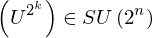

In [5]:
deduceInNaturalsPos(Exponentiate(two, k), {kInNats}).proven({kInNats})
deduceInNaturalsPos(Exponentiate(two, n_)).proven()
intPowSUclosure.specialize({n:Exponentiate(two, n_), k:Exponentiate(two, k)}).specialize({U:U_}).proven({kInNats})

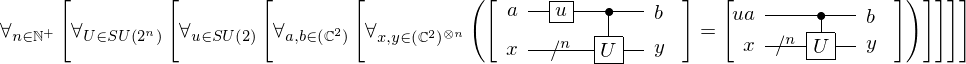

In [6]:
pregatedControlledNgateEquiv

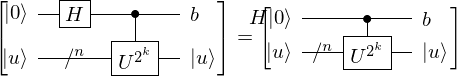

In [7]:
bQubitState = In(b, QubitSpace)
circuitEquiv1 = pregatedControlledNgateEquiv.specialize({n:n_}).specialize({U:U_pow_two_pow_k}).specialize({u:H}).specialize({a:ket0}).specialize({x:Ket(u_), y:Ket(u_)})
circuitEquiv1.proven({bQubitState, kInNats})

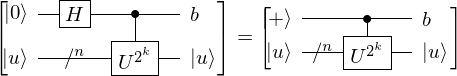

In [8]:
circuitEquiv2 = hadamardOnZero.subRightSideInto(circuitEquiv1)
circuitEquiv2.proven({bQubitState, kInNats})

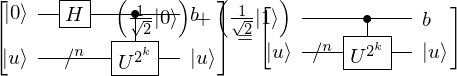

In [9]:
circuitEquiv3 = ketPlusDistributed.subRightSideInto(circuitEquiv2)
circuitEquiv3.proven({bQubitState, kInNats})

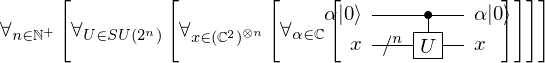

In [10]:
zeroControlledNgate

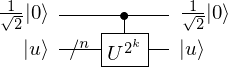

In [11]:
deduceInComplexes(invRoot2)
zeroControlledUpowGate = zeroControlledNgate.specialize({n:n_}).specialize({U:U_pow_two_pow_k}).specialize({x:Ket(u_)}).specialize({alpha:invRoot2})
zeroControlledUpowGate.proven({kInNats})

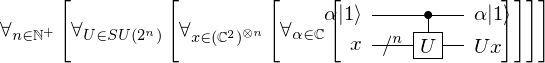

In [12]:
oneControlledNgate

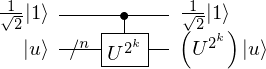

In [13]:
oneControlledUpowGate = oneControlledNgate.specialize({n:n_}).specialize({U:U_pow_two_pow_k}).specialize({x:Ket(u_)}).specialize({alpha:invRoot2})
oneControlledUpowGate.proven({kInNats})

In [14]:
display(eigenPow)
display(eigenUu)
eigenValueU = eigenUu.rhs.scalar
display(deduceInNaturalsPos(Exponentiate(two, k), {kInNats}).proven({kInNats}))
display(deduceInComplexes(eigenValueU).proven())

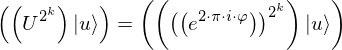

In [15]:
eigenUpow_u1 = eigenPow.specialize({k:Exponentiate(two, k)}).specialize({b:eigenValueU}).specialize({A:U_, x:Ket(u_)}).deriveConclusion()
eigenUpow_u1.proven({kInNats})

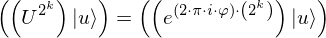

In [16]:
eigenUpow_u2 = eigenUpow_u1.rhs.scalar.lowerOuterPow({kInNats}).subRightSideInto(eigenUpow_u1)
eigenUpow_u2.proven({kInNats})

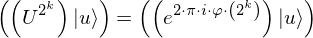

In [17]:
eigenUpow_u = eigenUpow_u2.rhs.scalar.exponent.ungroup(0, {kInNats}).subRightSideInto(eigenUpow_u2)
eigenUpow_u.proven({kInNats})

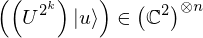

In [18]:
phaseFactor = eigenUpow_u.rhs.scalar
deduceInComplexes(phaseFactor, {kInNats})
scaled_u_inQregSpace = scaledQubitRegisterStateInQubitRegisterSpace.specialize({n:n_}).specialize({x:Ket(u_)}).specialize({alpha:phaseFactor})
eigenUpow_u.subLeftSideInto(scaled_u_inQregSpace).proven({kInNats})

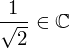

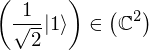

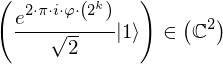

In [19]:
display(deduceInComplexes(invRoot2))
display(scaledQubitStateInQubitSpace.specialize({x:ket1}).specialize({alpha:invRoot2}).proven())
scaledPhaseFactor = Fraction(phaseFactor, Sqrt(two))
deduceInComplexes(scaledPhaseFactor, {kInNats})
display(scaledQubitStateInQubitSpace.specialize({x:ket1}).specialize({alpha:scaledPhaseFactor}).proven({kInNats}))

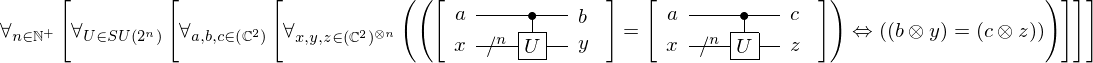

In [20]:
controlledNgateEquiv

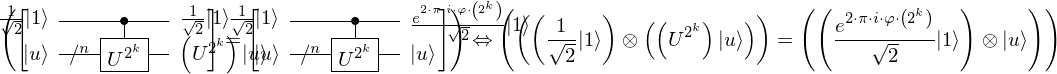

In [21]:
oneControlledUpowGateEquiv = controlledNgateEquiv.specialize({n:n_}).specialize({U:U_pow_two_pow_k}).specialize({a:ScalarProd(invRoot2, ket1), b:ScalarProd(invRoot2, ket1), c:ScalarProd(scaledPhaseFactor, ket1)}).specialize({x:Ket(u_), y:MatrixProd(U_pow_two_pow_k, Ket(u_)), z:Ket(u_)})
oneControlledUpowGateEquiv.proven({kInNats}) 

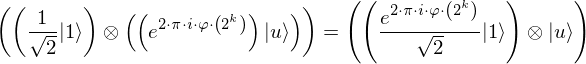

In [22]:
tensorProdEq = eigenUpow_u.subRightSideInto(oneControlledUpowGateEquiv.operands[1])
tensorProdEq

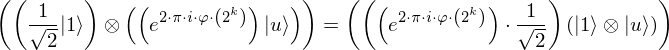

In [23]:
tensorProdLhsEq = Equation()
tensorProdLhsEq.update(tensorProdEq.lhs.factor(phaseFactor)).proven()
tensorProdLhsEq.update(tensorProdLhsEq.eqExpr.rhs.factor(invRoot2)).proven()

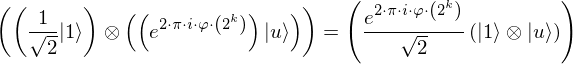

In [24]:
tensorProdLhsEq.eqExpr.rhs.scalar.distribute(1, {kInNats}).subRightSideInto(tensorProdLhsEq.eqExpr).proven({kInNats})

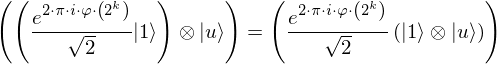

In [25]:
tensorProdRhsEq = tensorProdEq.rhs.factor(scaledPhaseFactor)
tensorProdRhsEq.proven()

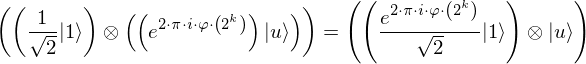

In [26]:
tensorProdEq2 = Equals(tensorProdRhsEq.rhs, tensorProdRhsEq.rhs).concludeViaReflexivity().proven()
tensorProdEq3 = tensorProdLhsEq.eqExpr.subLeftSideInto(Equals(X, tensorProdRhsEq.rhs), X).proven({kInNats})
tensorProdRhsEq.subLeftSideInto(tensorProdEq3).proven({kInNats}) # tensorProdEq now proven

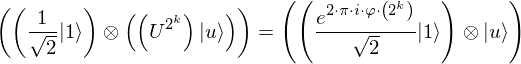

In [27]:
eigenUpow_u.subLeftSideInto(tensorProdEq).proven({kInNats})

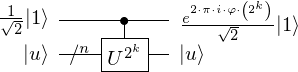

In [28]:
oneControlledUpowGate = oneControlledUpowGateEquiv.deriveLeft().deriveRightViaEquivalence()
oneControlledUpowGate.proven({kInNats})

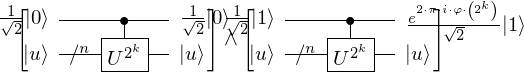

In [29]:
compose(zeroControlledUpowGate, oneControlledUpowGate).proven({kInNats})

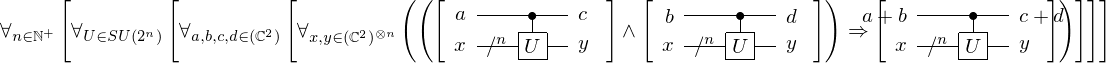

In [30]:
superpositionControlledNgate

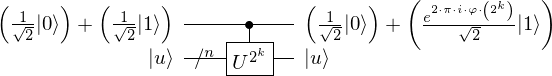

In [31]:
scaledQubitStateInQubitSpace.specialize({x:ket0}).specialize({alpha:invRoot2}).proven()
scaledQubitStateInQubitSpace.specialize({x:ket1}).specialize({alpha:scaledPhaseFactor}).proven({kInNats})
superPositionControlledUpowGate = superpositionControlledNgate.specialize({n:n_}).specialize({U:U_pow_two_pow_k}).specialize({a:ScalarProd(invRoot2, ket0), b:ScalarProd(invRoot2, ket1), c:ScalarProd(invRoot2, ket0), d:ScalarProd(scaledPhaseFactor, ket1)}).specialize({x:Ket(u_), y:Ket(u_)}).deriveConclusion()
superPositionControlledUpowGate.proven({kInNats})

In [32]:
summedQubitStateInQubitSpace

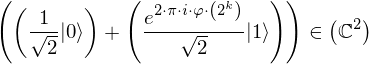

In [33]:
topOutputState = Add(ScalarProd(invRoot2, ket0), ScalarProd(scaledPhaseFactor, ket1))
summedQubitStateInQubitSpace.specialize({xEtc:topOutputState.terms}).proven({kInNats})

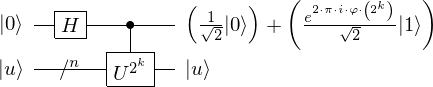

In [34]:
intermediateCircuit = circuitEquiv3.generalize(b, domain=QubitSpace).specialize({b:topOutputState}).deriveLeftViaEquivalence()
intermediateCircuit.proven({kInNats})

root $\forall_{ k  \in \mathbb{N}} \left[
\begin{array}{cc}
\Qcircuit @C=1em @R=.7em { & \lstick{\lvert 0 \rangle} & \gate{H} & \ctrl{1} & \rstick{ \left(\frac{1}{\sqrt{2}}   \lvert 0 \rangle\right) + \left(\frac{e^{ 2 \cdot \pi \cdot i \cdot \varphi \cdot \left(2^{k}\right) }}{\sqrt{2}}   \lvert 1 \rangle\right) } \qw \\  & \lstick{\lvert u \rangle} & /^{n} \qw & \gate{U^{2^{k}}} & \rstick{\lvert u \rangle} \qw} & ~ 
\end{array}
\right]$ 
  generalizing $\begin{array}{cc}
\Qcircuit @C=1em @R=.7em { & \lstick{\lvert 0 \rangle} & \gate{H} & \ctrl{1} & \rstick{ \left(\frac{1}{\sqrt{2}}   \lvert 0 \rangle\right) + \left(\frac{e^{ 2 \cdot \pi \cdot i \cdot \varphi \cdot \left(2^{k}\right) }}{\sqrt{2}}   \lvert 1 \rangle\right) } \qw \\  & \lstick{\lvert u \rangle} & /^{n} \qw & \gate{U^{2^{k}}} & \rstick{\lvert u \rangle} \qw} & ~ 
\end{array}$  assuming $k \in \mathbb{N}$ 
    implication $\left[
\begin{array}{cc}
\Qcircuit @C=1em @R=.7em { & \lstick{ \left(\frac{1}{\sqrt{2}}   \lvert 0 \

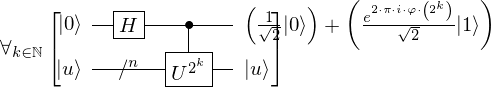

In [35]:
intermediateCircuit.generalize(k, domain=Naturals).qed()